In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#!pip install pandas
#!pip install matplotlib

# Sequential Timings

In [17]:
seq_timings = pd.read_csv('output/sequential.csv')
# video_path,k,res,microseconds
video_paths = seq_timings['video_path'].tolist()
microseconds = seq_timings['microseconds'].tolist()

T_seq = {}

for video, microseconds_list in zip(video_paths, microseconds):
    microseconds_measurements = [float(x) for x in microseconds_list.split('|')]
    print(video)
    print('Number of measurements:',len(microseconds_measurements))
    
    avg_microseconds = sum(microseconds_measurements) / len(microseconds_measurements)
    variance = sum([(x - avg_microseconds)**2 for x in microseconds_measurements]) / len(microseconds_measurements)
    std_dev = variance**0.5
    print('Avg microseconds:',avg_microseconds,'Avg seconds:',avg_microseconds / 1000000)
    print('Std microseconds:',std_dev,'Std seconds:',std_dev / 1000000)

    T_seq[video] = avg_microseconds
    print('------------------------------')

videos/earth_S.mp4
Number of measurements: 3
Avg microseconds: 455870.6666666667 Avg seconds: 0.4558706666666667
Std microseconds: 41005.03148259844 Std seconds: 0.04100503148259844
------------------------------
videos/earth_M.mp4
Number of measurements: 3
Avg microseconds: 1622954.3333333333 Avg seconds: 1.6229543333333332
Std microseconds: 23355.69255853675 Std seconds: 0.02335569255853675
------------------------------
videos/earth_L.mp4
Number of measurements: 3
Avg microseconds: 3775893.0 Avg seconds: 3.775893
Std microseconds: 9980.510741774024 Std seconds: 0.009980510741774024
------------------------------


# Thread

In [20]:
thread_timings = pd.read_csv('output/thread.csv')
# video_path,k,res,threads,microseconds
video_paths = thread_timings['video_path'].tolist()
threads = thread_timings['threads'].tolist()
microseconds = thread_timings['microseconds'].tolist()

T_thread = {} # map video_path to a map of threads to avg microseconds

for video, numberOfThreads, microseconds_list in zip(video_paths, threads, microseconds):
    microseconds_measurements = [float(x) for x in microseconds_list.split('|')]
    print(video)
    print('Number of measurements:',len(microseconds_measurements))
    print('Number of threads:',numberOfThreads)
    avg_microseconds = sum(microseconds_measurements) / len(microseconds_measurements)
    variance = sum([(x - avg_microseconds)**2 for x in microseconds_measurements]) / len(microseconds_measurements)
    std_dev = variance**0.5
    print('Avg microseconds:',avg_microseconds,'Avg seconds:',avg_microseconds / 1000000)
    print('Std microseconds:',std_dev,'Std seconds:',std_dev / 1000000)

    if video not in T_thread:
        T_thread[video] = {}
    T_thread[video][numberOfThreads] = avg_microseconds
    print('------------------------------')

videos/earth_S.mp4
Number of measurements: 3
Number of threads: 1
Avg microseconds: 392069.3333333333 Avg seconds: 0.3920693333333333
Std microseconds: 3354.0594641253588 Std seconds: 0.0033540594641253588
------------------------------
videos/earth_S.mp4
Number of measurements: 3
Number of threads: 2
Avg microseconds: 382126.0 Avg seconds: 0.382126
Std microseconds: 2418.6534821397354 Std seconds: 0.0024186534821397355
------------------------------
videos/earth_S.mp4
Number of measurements: 3
Number of threads: 3
Avg microseconds: 407561.6666666667 Avg seconds: 0.4075616666666667
Std microseconds: 7059.913612943307 Std seconds: 0.007059913612943307
------------------------------
videos/earth_S.mp4
Number of measurements: 3
Number of threads: 4
Avg microseconds: 395030.3333333333 Avg seconds: 0.3950303333333333
Std microseconds: 1522.0526345111136 Std seconds: 0.0015220526345111137
------------------------------
videos/earth_S.mp4
Number of measurements: 3
Number of threads: 5
Avg mic

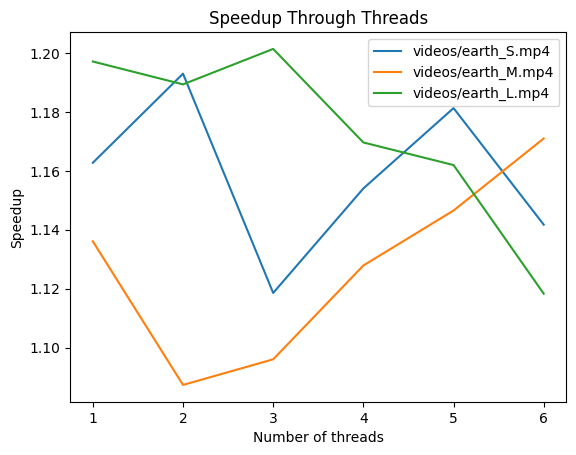

In [27]:
speedups = {}
for video in T_seq:
    speedups[video] = {}
    for thread in T_thread[video]:
        speedups[video][thread] = T_seq[video] / T_thread[video][thread]
    # plot speedups
    plt.plot(list(speedups[video].keys()),list(speedups[video].values()), label=video)
plt.legend()
plt.title('Speedup Through Threads')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.show()